# Exercises Day04

In [79]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt


def normpdf(x : float, mu : float, sigma : float) -> float:
    """
        Normal distribution probability density function.
        
        :param x: x value
        :param mu: mean
        :param sigma: standard deviation
        
        :return: probability density function value
    """
    return 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-1.0 / 2 * ((mu - x) / sigma)**2)

def compute_confidence_interval_sample(data : list[float], confidence : float = 0.95, normal : bool = False ) -> list[float]:
    """
        Compute the confidence interval of the mean of the data.
        :param data: list of data
        :param confidence: confidence level
        :param normal: whether of not the data is assumed normal distributed
        
        :return: confidence interval of the mean of the data
    """
    N = len(data)
    alpha = 1 - confidence

    data = np.array(data)
    if normal:
        conf_mean = [data.mean() + data.std()/np.sqrt(N) * scipy.stats.t.cdf(alpha/2, N - 1), data.mean() + data.std()/np.sqrt(N) * scipy.stats.t.cdf(1-alpha/2, N - 1)]
    else:
        conf_mean = [data.mean() - confidence * data.std()/np.sqrt(N), data.mean() + confidence * data.std()/np.sqrt(N)]
    
    return conf_mean


## Ex01

**Estimate an integral $\int_0^1 e^x d x$ by simulation (the Crude Monte Carlo estimator). Use e.g. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.**

In [50]:
# We assume that we may use numpy because we already went through with sampling from numpy once
# although you didn't explicitely state it as last time...
NUM_SAMPLES = 100

crude_monte_carlo = np.exp(np.random.uniform(0, 1, NUM_SAMPLES))
crude_mc_estimate = crude_monte_carlo.mean()
crude_mc_conf = compute_confidence_interval_sample(crude_monte_carlo)

print("Crude Monte Carlo (point) estimate: ", crude_mc_estimate)
print(f"Crude Monte Carlo confidence interval: [{crude_mc_conf[0]:.4f}, {crude_mc_conf[1]:.4f}]")
print(f"Crude Monte Carlo variance: {crude_monte_carlo.var():.4f}")

Crude Monte Carlo (point) estimate:  1.7723652521265247
Crude Monte Carlo confidence interval: [1.7275, 1.8172]
Crude Monte Carlo variance: 0.2227


## Ex02

**Estimate an integral $\int_0^1 e^x d x$ using antithetic variables, with comparable computer ressources.**

In [23]:
# Again we assume numpy is allowed :D

num_samples_antithetic = NUM_SAMPLES // 50  # <-- Going from crude to antithetic, reduces the variance by a factor of 50 (see slide 12 of 'slide7m1.pdf')

U = np.random.uniform(0, 1, NUM_SAMPLES)
X = np.exp(U)
Z = np.exp(1 - U)
Y = (X + Z) / 2

antithetic_estimate = Y.mean()
antithetic_conf = compute_confidence_interval_sample(Y)


print(f"Antithetic (point) estimate (with {num_samples_antithetic} samples): ", antithetic_estimate)
print(f"Antithetic confidence interval: [{antithetic_conf[0]:.4f}, {antithetic_conf[1]:.4f}]\n")
print(f"Crude Monte Carlo (point) estimate (with {NUM_SAMPLES} samples): ", crude_mc_estimate)
print(f"Crude Monte Carlo confidence interval: [{crude_mc_conf[0]:.4f}, {crude_mc_conf[1]:.4f}]")

Antithetic (point) estimate (with 2 samples):  1.714000038985301
Antithetic confidence interval: [1.7082, 1.7198]

Crude Monte Carlo (point) estimate (with 100 samples):  1.7171571577993947
Crude Monte Carlo confidence interval: [1.6695, 1.7648]


## Ex03

**Estimate an integral $\int_0^1 e^x d x$ using a control variable, with comparable computer ressources.**


In [74]:
cov = lambda x,y: np.sum((x - x.mean()) * (y - y.mean())) / (len(x) - 1) 

num_samples_control = 100

U = np.random.uniform(0, 1, num_samples_control) # Here U = Y from slides 
X = np.exp(U)

c =  - cov(U, X) / U.var()

Z = X + c * (U - 0.5)

control_estimate = Z.mean()
control_conf = compute_confidence_interval_sample(Z)


print(f"Control sampling (point) estimate (with {num_samples_control} samples): ", control_estimate)
print(f"Antithetic confidence interval: [{control_conf[0]:.4f}, {control_conf[1]:.4f}]\n")

print(f"Crude Monte Carlo (point) estimate (with {NUM_SAMPLES} samples): ", crude_mc_estimate)
print(f"Crude Monte Carlo confidence interval: [{crude_mc_conf[0]:.4f}, {crude_mc_conf[1]:.4f}]")



Control sampling (point) estimate (with 100 samples):  1.7197694913728996
Antithetic confidence interval: [1.7134, 1.7261]

Crude Monte Carlo (point) estimate (with 100 samples):  1.7723652521265247
Crude Monte Carlo confidence interval: [1.7275, 1.8172]


## Ex04

**Estimate an integral $\int_0^1 e^x d x$ using stratified sampling, with
comparable computer ressources.**


In [63]:
num_samples_stratified = 10
m = 10

W = 0
for i in range(m):
    W += np.exp(np.random.uniform((1 / m) * i, (1 / m) * (i + 1), num_samples_stratified) / m + i/m)

W /= m

stratified_estimate = W.mean()
stratified_conf = compute_confidence_interval_sample(W)

print(f"Stratified sampling (point) estimate (with {num_samples_stratified * m} samples): ", stratified_estimate)
print(f"Stratified confidence interval: [{stratified_conf[0]:.4f}, {stratified_conf[1]:.4f}]\n")

print(f"Crude Monte Carlo (point) estimate (with {NUM_SAMPLES} samples): ", crude_mc_estimate)
print(f"Crude Monte Carlo confidence interval: [{crude_mc_conf[0]:.4f}, {crude_mc_conf[1]:.4f}]")

Stratified sampling (point) estimate (with 100 samples):  1.7325618968890986
Stratified confidence interval: [1.7321, 1.7330]

Crude Monte Carlo (point) estimate (with 100 samples):  1.7723652521265247
Crude Monte Carlo confidence interval: [1.7275, 1.8172]


## Ex05

**Use control variates to reduce the variance of the estimator in
exercise 04 (Poisson arrivals).**

$$
\tilde{X} = X + c_1 ( \bar{X}_{arrival} - \frac{1}{\lambda})
$$

X is here blocked rate (vector of all the samples)

## Ex06

**Demonstrate the effect of using common random numbers in exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times.**

*Remark: You might need to do some thinking and some re-programming* 

## Ex07

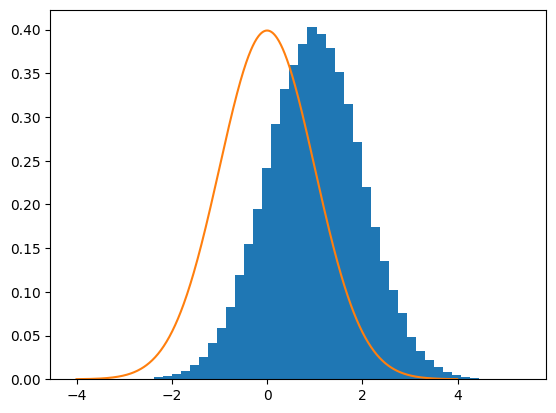

In [94]:
NUM_SAMPLES= 100000

h = lambda x:   scipy.stats.norm.ppf(U)

U = np.random.uniform(0, 1, NUM_SAMPLES)
X = 1-  scipy.stats.norm.isf(U)

XX =  np.arange(-4, 4, 0.01)
Y = np.array([normpdf(x, 0, 1) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

In [99]:
# Crude monte carlo?
NUM_SAMPLES= 100000
X =  np.random.normal(0, 1, NUM_SAMPLES)
a = 2 # Try different values

print(np.sum(X<a)/NUM_SAMPLES)
print(scipy.stats.norm.cdf(a,0,1))


# Importance sampling


0.97802
0.9772498680518208


In [104]:
a = 2 

NUM_SAMPLES= 100
U = np.random.uniform(0, np.abs(a), NUM_SAMPLES)
X = scipy.stats.norm.cdf(U)

print(X )




[0.82286919 0.58169317 0.82620987 0.83646022 0.68552121 0.90556778
 0.95148263 0.68027052 0.58920701 0.95440663 0.96714824 0.90584545
 0.85600321 0.96086674 0.58589029 0.85262498 0.97382994 0.86563782
 0.84782187 0.931686   0.94036981 0.55173978 0.90799244 0.9443886
 0.97450245 0.55242665 0.96036192 0.94791253 0.94804956 0.9455911
 0.83389132 0.9768906  0.92160398 0.83796981 0.51204398 0.96697783
 0.87661025 0.93613014 0.63630807 0.60550311 0.77176787 0.86168071
 0.55944815 0.96040907 0.96684148 0.7859911  0.82960052 0.69428506
 0.8417158  0.5729112  0.91046426 0.61966132 0.87744817 0.73139968
 0.90194648 0.52930794 0.89886338 0.7122255  0.68146887 0.58425694
 0.91989687 0.56536488 0.50292013 0.86010117 0.96214533 0.70508971
 0.89769111 0.93427    0.61924756 0.67027819 0.95487785 0.88132262
 0.9629169  0.97294435 0.70428656 0.56704589 0.54200531 0.79348209
 0.58894889 0.61868025 0.7533451  0.87118913 0.71789772 0.73552035
 0.95860625 0.90002053 0.75310256 0.92276051 0.81288842 0.779884

## Ex08

## Ex09